# Kalman Filters
### Introduction to Kalman Filters
**Kalman Filters** are used to estimate the state of a system from a series of incomplete and noisy measurements.
It uses a series of measurements observed over time to produce estimates of unknown variables.
These estimates tend to be more accurate than those based on a single measurement alone.


## Import necessary libraries
First, we need to import necessary libraries

In [32]:
# Import necessary libraries
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

## Implement the Kalman Filter's Function
Now, let's go ahead and create the Kalman Filter's function and load financial data.

[*********************100%%**********************]  1 of 1 completed


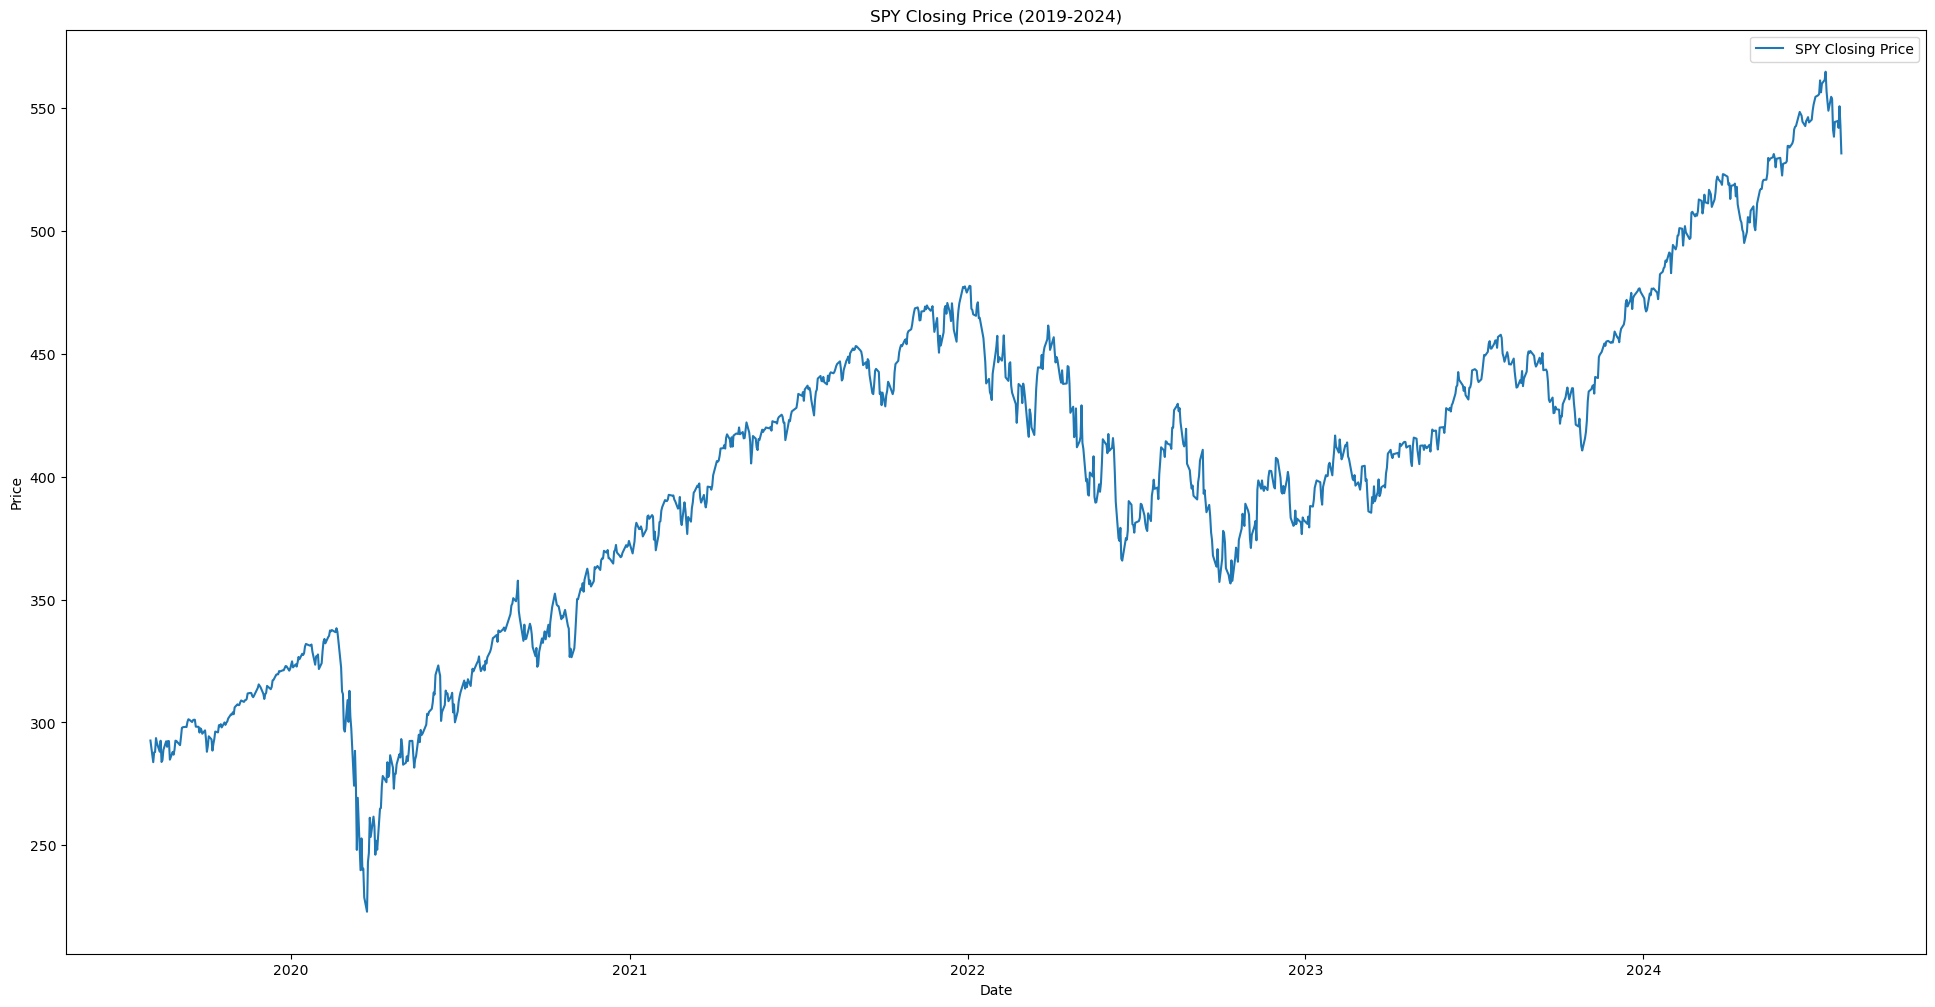

In [33]:
# Kalman Filter class
class KalmanFilter:
    def __init__(self, A, B, H, Q, R, initial_state, initial_covariance):
        self.A = A  # State transition matrix
        self.B = B  # Control input matrix
        self.H = H  # Observation matrix
        self.Q = Q  # Process noise covariance
        self.R = R  # Measurement noise covariance
        self.x = initial_state  # Initial state estimate
        self.P = initial_covariance  # Initial covariance estimate

    def predict(self, u=0):
        # Predict the state and covariance
        self.x = np.dot(self.A, self.x) + np.dot(self.B, u)
        self.P = np.dot(np.dot(self.A, self.P), self.A.T) + self.Q
        return self.x

    def update(self, z):
        # Update the state estimate using the new measurement z
        y = z - np.dot(self.H, self.x)
        S = np.dot(np.dot(self.H, self.P), self.H.T) + self.R
        K = np.dot(np.dot(self.P, self.H.T), np.linalg.inv(S))
        self.x = self.x + np.dot(K, y)
        I = np.eye(self.A.shape[1])
        self.P = np.dot(np.dot(I - np.dot(K, self.H), self.P), (I - np.dot(K, self.H)).T) + np.dot(np.dot(K, self.R), K.T)
        return self.x

# Download SPY data from Yahoo Finance
spy_data = yf.download('SPY', period='5y')

# Extract the closing prices and handle missing data by interpolation
spy_close = spy_data['Close'].interpolate()

# Plot the closing prices
plt.figure(figsize=(24, 12))
plt.plot(spy_close, label='SPY Closing Price')
plt.title('SPY Closing Price (2019-2024)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

### Define the Kalman Parameters

In [34]:
# Define the Kalman Filter parameters with adjusted Q and R
A = np.array([[1]])  # State transition matrix
B = np.array([[0]])  # Control input matrix
H = np.array([[1]])  # Observation matrix
Q = np.array([[1e-4]])  # Process noise covariance (increased)
R = np.array([[1]])  # Measurement noise covariance (decreased)
initial_state = np.array([[spy_close.iloc[0]]])  # Initial state estimate
initial_covariance = np.array([[1]])  # Initial covariance estimate

### Create and Apply the Kalman Filters

Mean Squared Error of the Kalman Filter: 978.10


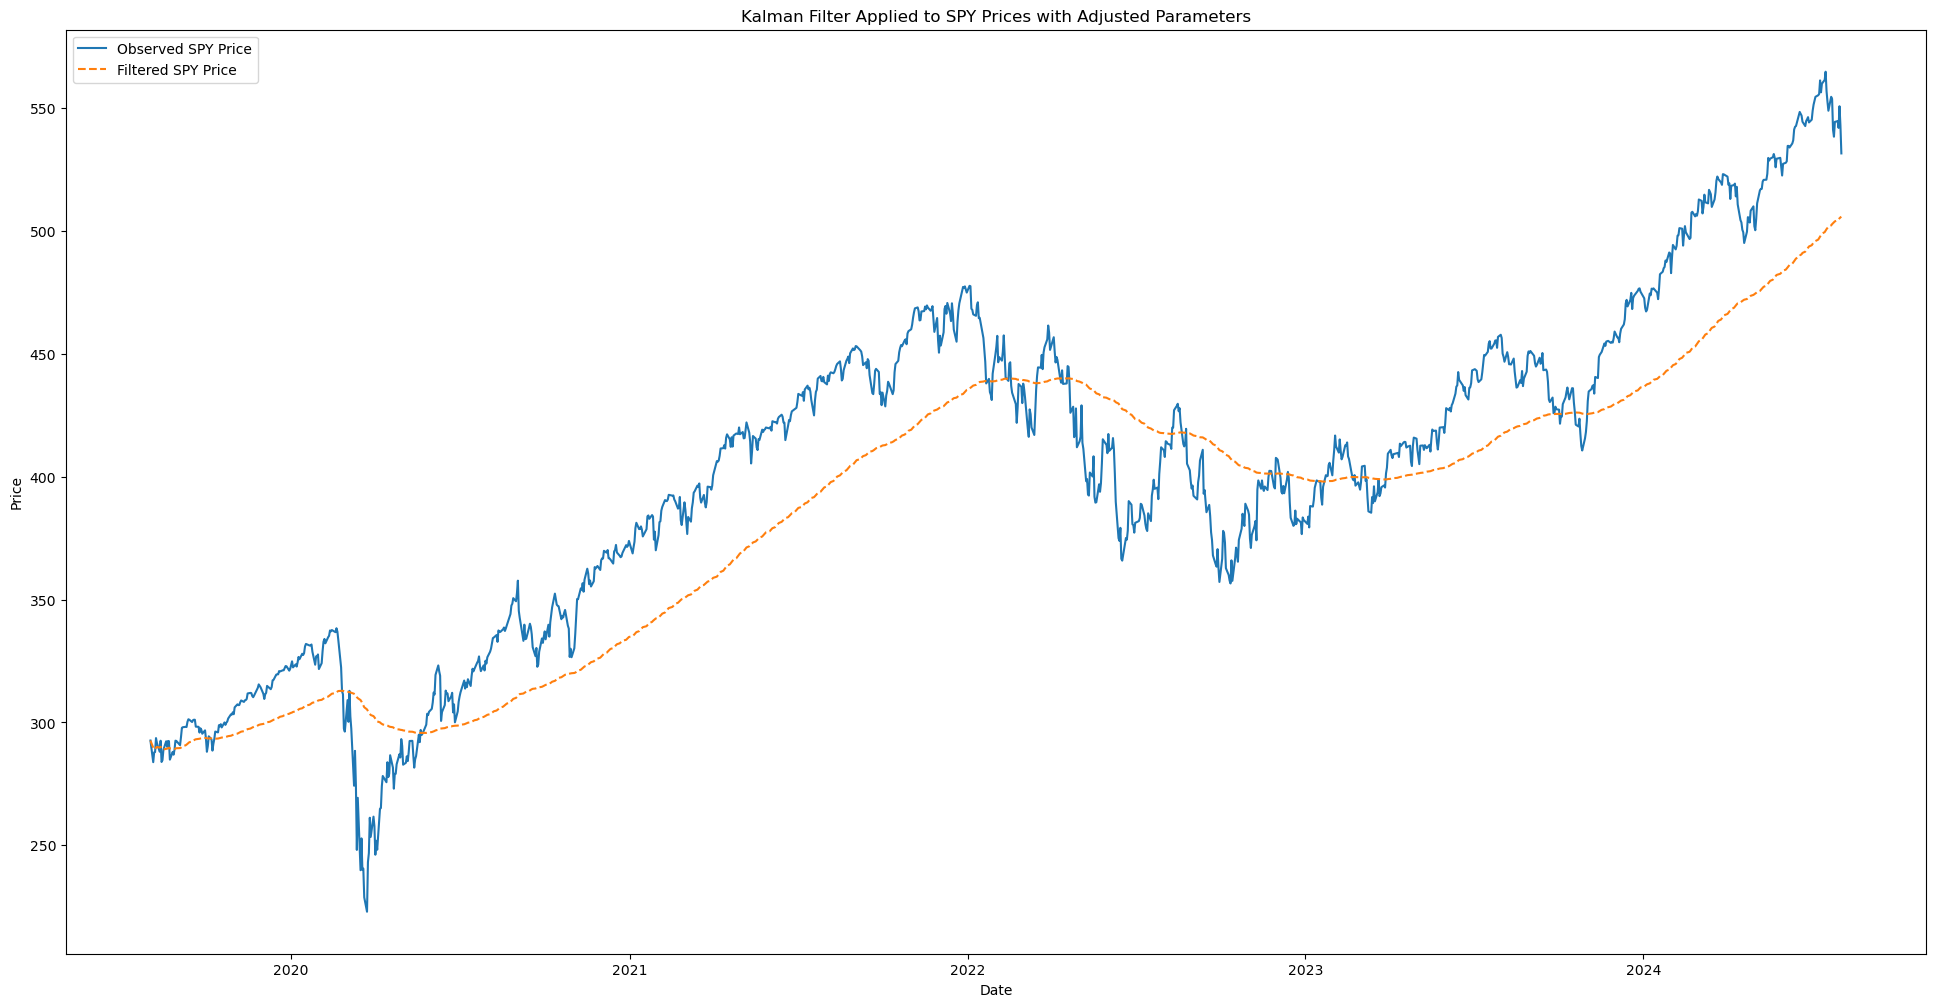

In [35]:
# Create the Kalman Filter
kf = KalmanFilter(A, B, H, Q, R, initial_state, initial_covariance)

# Apply the Kalman Filter to the observed data
filtered_price = []
for z in spy_close:
    kf.predict()
    filtered_price.append(kf.update(z)[0])

# Convert filtered_price list to a pandas Series
filtered_price = pd.Series(filtered_price, index=spy_close.index)

# Calculate performance metrics
mse = mean_squared_error(spy_close, filtered_price)
print(f"Mean Squared Error of the Kalman Filter: {mse:.2f}")

# Plot the results
plt.figure(figsize=(24, 12))
plt.plot(spy_close, label='Observed SPY Price', alpha=1)
plt.plot(filtered_price, label='Filtered SPY Price', linestyle='--')
plt.legend()
plt.title('Kalman Filter Applied to SPY Prices with Adjusted Parameters')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()